In [1]:
import numpy as np 
import pandas as pd 

In [2]:
trainData = pd.read_csv('train.csv')
X_test= pd.read_csv('test.csv')
print('training data shape :',trainData.shape)
print('test data shape :',X_test.shape)
trainData.head()

training data shape : (42000, 785)
test data shape : (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split
Y = trainData.iloc[:,0]
X = trainData.iloc[:,1:]

X=X/255.0
X_test=X_test/255.0

X_training, X_validation, Y_training, Y_validation = train_test_split(X,Y,test_size=0.1,shuffle = True)

In [4]:
print('training data shape :',X_training.shape)
print('validation data shape :',X_validation.shape)
X_training.head()

training data shape : (37800, 784)
validation data shape : (4200, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
24080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


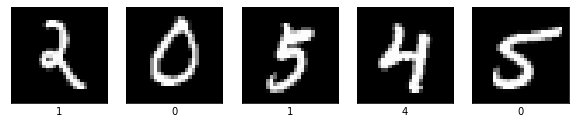

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
i=0
for j,row in X_training.head().iterrows():
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(row.values.reshape((28, 28)), cmap='gray')
    plt.xlabel(Y.loc[i])
    i=i+1

In [7]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='relu',hidden_layer_sizes=(392,196,98),solver='adam',verbose=True,max_iter=100)
clf.fit(X_training,Y_training)

Iteration 1, loss = 0.34655763
Iteration 2, loss = 0.11956301
Iteration 3, loss = 0.08000866
Iteration 4, loss = 0.05309578
Iteration 5, loss = 0.03866152
Iteration 6, loss = 0.02652651
Iteration 7, loss = 0.02129894
Iteration 8, loss = 0.01501026
Iteration 9, loss = 0.01576329
Iteration 10, loss = 0.01567254
Iteration 11, loss = 0.01100018
Iteration 12, loss = 0.01438960
Iteration 13, loss = 0.01036361
Iteration 14, loss = 0.01028414
Iteration 15, loss = 0.00480768
Iteration 16, loss = 0.01077968
Iteration 17, loss = 0.01250589
Iteration 18, loss = 0.01197569
Iteration 19, loss = 0.00724365
Iteration 20, loss = 0.00522883
Iteration 21, loss = 0.00881019
Iteration 22, loss = 0.00690589
Iteration 23, loss = 0.00499093
Iteration 24, loss = 0.00891464
Iteration 25, loss = 0.00610973
Iteration 26, loss = 0.00512411
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(392, 196, 98), learning_rate='constant',
              learning_rate_init=0.001, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [8]:
y_valid_pred = clf.predict(X_validation)
from sklearn.metrics import accuracy_score
accuracy_score(Y_validation,y_valid_pred)

0.9757142857142858

In [9]:
y_pred = clf.predict(X_test)

In [10]:
df = pd.DataFrame({'Label':y_pred})
df.index.name='ImageId'
df.index = df.index +1
df.to_csv('submission.csv')